In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


In [3]:
# Import the fashion mnist dataset which contains 70,000 grayscale images in 10 categories. (28 x 28 pixels)
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels) , (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
class_names = ['T-shirt/top','Trouser','pullover','Dress','coat','Sandal','Shirt','sneaker','Bag','Ankle Boot']

Each image is mapped to a single label. Since  the class names are not included with the dataset, store them here to use later when plotting the images.

In [8]:
# Explore the data
train_images.shape 
# 60,000 images with 28 x 28 pixels

(60000, 28, 28)

In [10]:
train_labels
# Each label is an integer between 0 and 9.

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape 
# 10,000 images with 28 x 28 pixels

(10000, 28, 28)

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of **0 to 255.**

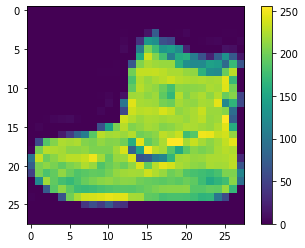

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
train_images = train_images/255.0
test_images = test_images/255.0

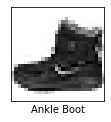

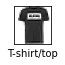

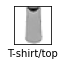

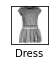

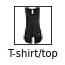

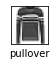

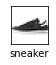

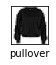

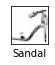

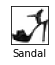

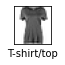

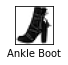

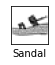

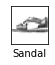

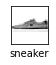

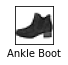

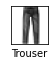

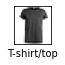

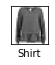

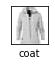

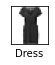

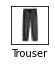

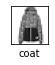

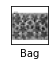

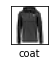

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  plt.show()


In [18]:
# Build the model
# 1. Set up the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10)
])

1st layer >>> keras.layers.Flatten, transform the format of images from a two dimensional array (28 x 28 pixel) in to one dimensional array (28 x 28 = 784 pixel) , Only reformats the data.

Dense layer >>>> 128 nodes and current image belongs to one of the 10 classes.

**Compile the Model**

*Need to do before the training.*

A) **Loss function** - this measure how accurate the model is during the training.

B) **Optimizer** - This is how the model is updated based on the data it sees and its loss function.

C) **Metrics** - Used to monitor the following examples uses accuracy, the fraction of the images that are correctly classified.


In [20]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


**Train the model**

1. feed the training data to the model
2. The model learns to associate images and labels.
3. Now, you can ask the model to make prediction about a test set.
4. Verify that the model to make prediction about a test set.

In [21]:
# Feed the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5017 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3766 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3380 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3136 - accuracy: 0.8835
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2953 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2802 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2681 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2563 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2494 - accuracy: 0.9063
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.240

*Loss and accuracy metrics are displayed. The model reaches 91% accuracy of the training data*


In [22]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("\n Test Accuracy :", test_acc)

313/313 - 1s - loss: 0.3589 - accuracy: 0.8779 - 648ms/epoch - 2ms/step

 Test Accuracy : 0.8779000043869019


*It turns out accuracy on the test dataset is a little less than the accuracy of the training dataset*

In [25]:
# Make Predictions
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([3.4115155e-10, 1.5522572e-09, 6.7940492e-10, 1.4356635e-09,
       1.7677344e-11, 4.1756557e-05, 2.2978854e-08, 1.7396625e-03,
       2.3067932e-10, 9.9821854e-01], dtype=float32)

*A prediction is an array of the 10 numbers. They represent the models "Confidence" that the image corresonds to each of the 10 different article of clothing.*

In [26]:
# we can see that, which label has the higest confidence value.
np.argmax(predictions[0])

9

In [27]:
test_labels[0]

9

*The model is most confident that this image ankel boot, or class_names[9].*

*Examing the test label shows that this classification is correct*


In [28]:
# Use the ytrained model

img = test_images[1]
print(img.shape)

(28, 28)


In [29]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [31]:
prediction_single = probability_model.predict(img)
print(prediction_single)

1/1 [==============================] - 0s 22ms/step
[[1.9199875e-05 1.1937049e-16 9.9982774e-01 1.2807441e-12 1.2391484e-04
  2.9684822e-14 2.9080555e-05 6.3571973e-19 4.6299852e-12 2.1477871e-15]]
1/1 [==============================] - 0s 17ms/step
[[1.9199875e-05 1.1937049e-16 9.9982774e-01 1.2807441e-12 1.2391484e-04
  2.9684822e-14 2.9080555e-05 6.3571973e-19 4.6299852e-12 2.1477871e-15]]


In [32]:
np.argmax(prediction_single[0])

2